#Theory

1. Can we use Bagging for regression problems?

ans- Yes, Bagging can be used for regression via models like Bagging Regressor, where predictions are averaged over multiple models.

2. What is the difference between multiple model training and single model training?

ans- Single model: One model trained on the entire dataset.

Multiple model (ensemble): Multiple models trained (possibly on different data subsets) and their outputs are combined for improved performance.

3. Explain the concept of feature randomness in Random Forest.

ans- In Random Forest, each split at a node considers only a random subset of features, reducing correlation between trees and improving generalization.
4. What is OOB (Out-of-Bag) Score?

ans- It’s a validation score estimated using data not included in the bootstrap sample for a particular tree, acting like cross-validation for Bagging/Random Forest.

5. How can you measure the importance of features in a Random Forest model?

ans- Mean Decrease in Impurity (MDI)

Permutation Importance
These show how much each feature contributes to prediction accuracy.

6. Explain the working principle of a Bagging Classifier.

ans- Create multiple bootstrap samples

Train a base classifier (e.g., decision tree) on each

Combine predictions using majority voting

7. How do you evaluate a Bagging Classifier’s performance?

ans- Use metrics like accuracy, precision, recall, F1-score, and OOB score or cross-validation results.

8. How does a Bagging Regressor work?

ans- Uses multiple regressors (e.g., decision trees) on different bootstrap samples

Final prediction is the average of all individual model predictions

9. What is the main advantage of ensemble techniques?

ans- They reduce variance and bias, and improve robustness and accuracy by combining multiple models.

10. What is the main challenge of ensemble methods?

ans- They can be computationally expensive, hard to interpret, and require careful tuning to avoid overfitting.

11. Explain the key idea behind ensemble techniques.

ans- “Wisdom of the crowd” — combining many weak or diverse models can yield a stronger and more accurate model.

12. What is a Random Forest Classifier?

ans- It’s an ensemble of decision trees trained using Bagging, with added randomness (feature selection), combining predictions via majority voting.

13. What are the main types of ensemble techniques?

ans- Bagging

Boosting

Stacking

Voting

14. What is ensemble learning in machine learning?

ans- It refers to combining multiple models to improve overall prediction performance compared to individual models.

15. When should we avoid using ensemble methods?

ans- When interpretability is crucial

When dataset is small

When computational resources are limited

16. How does Bagging help in reducing overfitting?

ans- By training on different data subsets and averaging, Bagging reduces the variance of high-variance models like decision trees.

17. Why is Random Forest better than a single Decision Tree?

ans- It’s more accurate, stable, and resistant to overfitting due to averaging over multiple uncorrelated trees.

18. What is the role of bootstrap sampling in Bagging?

ans- It introduces variance by training each model on a random subset (with replacement), promoting model diversity.

19. What are some real-world applications of ensemble techniques?

ans- Fraud detection

Sentiment analysis

Medical diagnosis

Stock market prediction

Image and speech recognition

20. What is the difference between Bagging and Boosting?

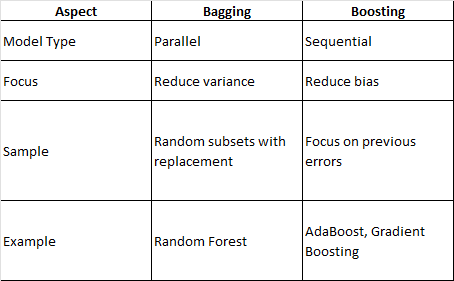

#Practical

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Train Bagging Regressor
regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Print feature importances
importances = rf_clf.feature_importances_
for name, importance in zip(data.feature_names, importances):
    print(f"{name}: {importance:.4f}")


mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069


24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

# Train single Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)

# Evaluate both
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, tree_pred))


Random Forest MSE: 0.034179532163742685
Decision Tree MSE: 0.05847953216374269


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [ ]:
# Train Random Forest with OOB enabled
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)

# Print OOB Score
print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.9547738693467337


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [ ]:
from sklearn.svm import SVC

# SVM as base estimator in Bagging
svm_bagging = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
svm_bagging.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_bagging.predict(X_test)
print("Bagging with SVM Accuracy:", accuracy_score(y_test, y_pred))


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n_trees in [10, 50, 100]:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"Accuracy with {n_trees} trees: {accuracy_score(y_test, y_pred):.4f}")

Accuracy with 10 trees: 0.9561
Accuracy with 50 trees: 0.9649
Accuracy with 100 trees: 0.9649


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

bagging_lr = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)
y_proba = bagging_lr.predict_proba(X_test)[:, 1]
print("\n--- Task 28 ---")
print(f"AUC Score (Bagging with Logistic Regression): {roc_auc_score(y_test, y_proba):.4f}")


29. Train a Random Forest Regressor and analyze feature importance scores.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes

X_reg, y_reg = load_diabetes(return_X_y=True)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
print("Feature importances:", rf_reg.feature_importances_)

Feature importances: [0.05864167 0.00963304 0.35546898 0.08840759 0.05278353 0.05722749
 0.05133862 0.02421276 0.23095698 0.07132935]


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [ ]:
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)

acc_bagging = accuracy_score(y_test, y_pred_bag)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"BaggingClassifier Accuracy: {acc_bagging:.4f}")
print(f"RandomForestClassifier Accuracy: {acc_rf:.4f}")


BaggingClassifier Accuracy: 0.9561
RandomForestClassifier Accuracy: 0.9649


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rfc = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output best params and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimator
base_estimator = DecisionTreeRegressor()

# Varying number of estimators
n_estimators_list = [1, 5, 10, 20, 50, 100]
mse_list = []

for n in n_estimators_list:
    model = BaggingRegressor(base_estimator=base_estimator, n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Plot performance
plt.plot(n_estimators_list, mse_list, marker='o')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Bagging Regressor Performance')
plt.grid(True)
plt.show()


33. Train a Random Forest Classifier and analyze misclassified samples.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Identify misclassified samples
misclassified_indices = (y_pred != y_test)
misclassified_samples = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

# Display misclassified results
df = pd.DataFrame(misclassified_samples, columns=[f'Feature {i}' for i in range(X.shape[1])])
df['True Label'] = true_labels
df['Predicted Label'] = predicted_labels

print("Misclassified Samples:")
print(df)


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Single Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# Compare performance
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")


35. Compare performance of Random Forest and Bagging Classifier on the same dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Bagging Classifier with Decision Tree
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# Output comparison
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")


36. Use Out-of-Bag (OOB) score for a Random Forest Classifier and compare it with test accuracy.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with OOB enabled
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate test accuracy
y_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Output scores
print(f"OOB Score: {rf_model.oob_score_:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


OOB Score: 0.9167
Test Accuracy: 1.0000


37. Implement feature importance using a Random Forest Classifier and visualize it.


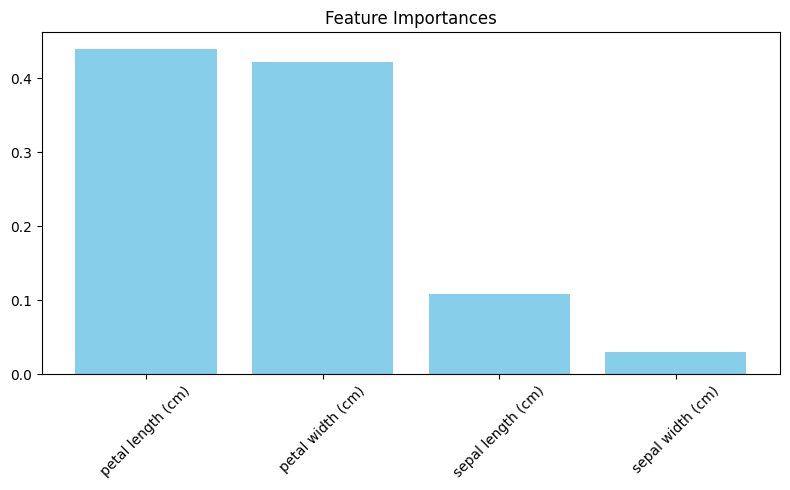

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize
plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='skyblue', align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


38. Train a Stacking Classifier using Logistic Regression, Decision Tree, and SVM as base learners.

In [4]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base and final estimators
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]
final_estimator = LogisticRegression()

# Train Stacking Classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=5)
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stack_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 1.0000


39. Compare Stacking Classifier accuracy with individual base learners.

In [3]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Train individual models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Individual predictions and accuracy
acc_lr = accuracy_score(y_test, lr.predict(X_test))
acc_dt = accuracy_score(y_test, dt.predict(X_test))
acc_svm = accuracy_score(y_test, svm.predict(X_test))

# Stacking Classifier
base_learners = [('lr', lr), ('dt', dt), ('svm', svm)]
final_estimator = LogisticRegression()
stack_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=5)
stack_model.fit(X_train, y_train)
acc_stack = accuracy_score(y_test, stack_model.predict(X_test))

# Display results
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"Stacking Classifier Accuracy: {acc_stack:.4f}")


Logistic Regression Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
SVM Accuracy: 1.0000
Stacking Classifier Accuracy: 1.0000
